<a href="https://colab.research.google.com/github/ankit250505/Cognifyz_Intern_Tasks/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 2**
---
  * Objective:
    Perform a geographical analysis of the
    restaurants in the dataset.

  * Steps:
    1. Explore the latitude and longitude coordinates of
      the restaurants and visualize their distribution on a
      map.
    2. Group the restaurants by city or locality and
      analyze the concentration of restaurants in
      different areas.
    3. Calculate statistics such as the average ratings,
      cuisines, or price ranges by city or locality.
    4. Identify any interesting insights or patterns related
      to the locations of the restaurants.

#**IMOPORTING AND INSTALLING PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**DATABASE**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cognifyz/restaurants.csv')
df

,Restaurant ID_,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


#**Data Analysis**

In [ ]:
# Renaming the names and inserting "_" in spaces for better readability
df.rename(columns
          ={
              'Restaurant ID_': 'Restaurant_ID',
              'Restaurant Name': 'Restaurant_Name',
              'Country Code': 'Country_Code',
              'City': 'City',
              'Address': 'Address',
              'Locality': 'Locality',
              'Locality Verbose': 'Locality_Verbose',
              'Longitude': 'Longitude',
              'Latitude': 'Latitude',
              'Cuisines': 'Cuisines',
              'Average Cost for two': 'Average_Cost_for_two',
              'Currency': 'Currency',
              'Has Table booking': 'Has_Table_booking',
              'Has Online delivery': 'Has_Online_delivery',
              'Is delivering now': 'Is_delivering_now',
              'Switch to order menu': 'Switch_to_order_menu',
              'Price range': 'Price_range',
              'Aggregate rating': 'Aggregate_rating',
              'Rating color': 'Rating_color',
              'Rating text': 'Rating_text',
              'Votes': 'Votes'
          }, inplace=True)

#**Recommendation System**

In [ ]:
def load_and_preprocess_data(df):
    """Load and preprocess the restaurant dataset"""
    df=df.copy()
    # Display basic information about the dataset
    print("Dataset Information:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\nFirst few rows:")
    print(df.head())

    return df

In [ ]:
def preprocess_data(df):
    """Preprocess the dataset by handling missing values and encoding categorical variables"""

    print("\n=== DATA PREPROCESSING ===")

    # Check for missing values
    print("Missing values per column:")
    print(df.isnull().sum())

    # Handle missing values
    df = df.fillna(method='ffill').fillna(method='bfill')

    # Create a copy for processing
    df_processed = df.copy()

    # Extract cuisine types (split multiple cuisines)
    df_processed['Cuisine_List'] = df_processed['Cuisines'].str.split(', ')

    # Create price category
    df_processed['Price_Category'] = pd.cut(df_processed['Average_Cost_for_two'],
                                          bins=[0, 1000, 2000, 4000, np.inf],
                                          labels=['Budget', 'Mid-range', 'Expensive', 'Very Expensive'])

    # Create rating category
    df_processed['Rating_Category'] = pd.cut(df_processed['Aggregate_rating'],
                                           bins=[0, 3.0, 3.5, 4.0, 4.5, 5.0],
                                           labels=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])

    # Encode binary features
    binary_cols = ['Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu']
    le = LabelEncoder()
    for col in binary_cols:
        df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col])

    # Normalize numerical features
    scaler = StandardScaler()
    numerical_cols = ['Average_Cost_for_two', 'Aggregate_rating', 'Votes', 'Price_range']
    df_processed[['cost_normalized', 'rating_normalized', 'votes_normalized', 'price_range_normalized']] = \
        scaler.fit_transform(df_processed[numerical_cols])

    print("Preprocessing completed!")
    print(f"New shape: {df_processed.shape}")

    return df_processed, scaler, le

In [ ]:
class RestaurantRecommendationSystem:
    def __init__(self, df, scaler):
        self.df = df
        self.scaler = scaler
        self.cuisine_vectorizer = TfidfVectorizer()
        self.feature_matrix = None
        self._prepare_features()

    def _prepare_features(self):
        """Prepare feature matrix for similarity calculations"""

        # Create cuisine feature matrix
        cuisine_features = self.cuisine_vectorizer.fit_transform(self.df['Cuisines'])

        # Combine numerical features
        numerical_features = self.df[['cost_normalized', 'rating_normalized', 'votes_normalized', 'price_range_normalized']].values

        # Combine binary features
        binary_features = self.df[['Has_Table_booking_encoded', 'Has_Online_delivery_encoded',
                                  'Is_delivering_now_encoded', 'Switch_to_order_menu_encoded']].values

        # Combine all features
        from scipy.sparse import hstack, csr_matrix
        self.feature_matrix = hstack([
            cuisine_features,
            csr_matrix(numerical_features),
            csr_matrix(binary_features)
        ])

        print("Feature matrix prepared with shape:", self.feature_matrix.shape)

    def get_recommendations_by_preferences(self, preferences: Dict, top_k: int = 5) -> List[Dict]:
        """
        Get restaurant recommendations based on user preferences

        preferences: Dict with keys like 'cuisine', 'max_price', 'min_rating', 'city', 'table_booking'
        """

        # Filter restaurants based on hard constraints
        filtered_df = self.df.copy()

        # Apply filters
        if 'cuisine' in preferences:
            cuisine_mask = filtered_df['Cuisines'].str.contains(preferences['cuisine'], case=False, na=False)
            filtered_df = filtered_df[cuisine_mask]

        if 'max_price' in preferences:
            filtered_df = filtered_df[filtered_df['Average_Cost_for_two'] <= preferences['max_price']]

        if 'min_rating' in preferences:
            filtered_df = filtered_df[filtered_df['Aggregate_rating'] >= preferences['min_rating']]

        if 'city' in preferences:
            city_mask = filtered_df['City'].str.contains(preferences['city'], case=False, na=False)
            filtered_df = filtered_df[city_mask]

        if 'table_booking' in preferences:
            booking_value = 'Yes' if preferences['table_booking'] else 'No'
            filtered_df = filtered_df[filtered_df['Has_Table_booking'] == booking_value]

        # Sort by rating and votes (popularity)
        filtered_df = filtered_df.sort_values(['Aggregate_rating', 'Votes'], ascending=[False, False])

        # Get top recommendations
        recommendations = []
        for idx, row in filtered_df.head(top_k).iterrows():
            recommendations.append({
                'Restaurant_ID': row['Restaurant_ID'],
                'Restaurant_Name': row['Restaurant_Name'],
                'Cuisines': row['Cuisines'],
                'City': row['City'],
                'Average_Cost_for_two': row['Average_Cost_for_two'],
                'Aggregate_rating': row['Aggregate_rating'],
                'Rating_text': row['Rating_text'],
                'Votes': row['Votes'],
                'Address': row['Address'],
                'Has_Table_booking': row['Has_Table_booking'],
                'Has_Online_delivery': row['Has_Online_delivery']
            })

        return recommendations

    def get_similar_restaurants(self, restaurant_id: int, top_k: int = 5) -> List[Dict]:
        """Get restaurants similar to a given restaurant using content-based filtering"""

        try:
            # Find the restaurant index
            restaurant_idx = self.df[self.df['Restaurant_ID'] == restaurant_id].index[0]
        except IndexError:
            print(f"Restaurant with ID {restaurant_id} not found!")
            return []

        # Calculate similarity scores
        similarity_scores = cosine_similarity(
            self.feature_matrix[restaurant_idx:restaurant_idx+1],
            self.feature_matrix
        ).flatten()

        # Get top similar restaurants (excluding the restaurant itself)
        similar_indices = similarity_scores.argsort()[::-1][1:top_k+1]

        recommendations = []
        for idx in similar_indices:
            row = self.df.iloc[idx]
            recommendations.append({
                'Restaurant_ID': row['Restaurant_ID'],
                'Restaurant_Name': row['Restaurant_Name'],
                'Cuisines': row['Cuisines'],
                'City': row['City'],
                'Average_Cost_for_two': row['Average_Cost_for_two'],
                'Aggregate_rating': row['Aggregate_rating'],
                'Rating_text': row['Rating_text'],
                'Similarity_Score': similarity_scores[idx],
                'Address': row['Address']
            })

        return recommendations

In [ ]:
def visualize_data(df):
    """Create visualizations for the restaurant data"""

    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Distribution of ratings
    axes[0, 0].hist(df['Aggregate_rating'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    axes[0, 0].set_title('Distribution of Restaurant Ratings')
    axes[0, 0].set_xlabel('Rating')
    axes[0, 0].set_ylabel('Frequency')

    # 2. Price range distribution
    price_counts = df['Price_range'].value_counts().sort_index()
    axes[0, 1].bar(price_counts.index, price_counts.values, color='lightgreen', alpha=0.7, edgecolor='black')
    axes[0, 1].set_title('Distribution of Price Ranges')
    axes[0, 1].set_xlabel('Price Range')
    axes[0, 1].set_ylabel('Number of Restaurants')

    # 3. Average cost distribution
    axes[1, 0].hist(df['Average_Cost_for_two'], bins=15, color='salmon', alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Distribution of Average Cost for Two')
    axes[1, 0].set_xlabel('Average Cost')
    axes[1, 0].set_ylabel('Frequency')

    # 4. Rating vs Cost scatter plot
    axes[1, 1].scatter(df['Average_Cost_for_two'], df['Aggregate_rating'],
                      c=df['Price_range'], cmap='viridis', alpha=0.7)
    axes[1, 1].set_title('Rating vs Average Cost')
    axes[1, 1].set_xlabel('Average Cost for Two')
    axes[1, 1].set_ylabel('Aggregate Rating')

    plt.tight_layout()
    plt.show()

In [ ]:
def test_recommendation_system(recommender, df):
    """Test the recommendation system with sample user preferences"""

    print("\n=== TESTING RECOMMENDATION SYSTEM ===")

    # Test 1: Preference-based recommendations
    print("\n1. Testing preference-based recommendations:")
    print("User preferences: Japanese cuisine, max price 2000, min rating 4.0")

    preferences = {
        'cuisine': 'Japanese',
        'max_price': 2000,
        'min_rating': 4.0
    }

    recommendations = recommender.get_recommendations_by_preferences(preferences, top_k=3)

    if recommendations:
        for i, rec in enumerate(recommendations, 1):
            print(f"\n{i}. {rec['Restaurant_Name']}")
            print(f"   Cuisines: {rec['Cuisines']}")
            print(f"   Rating: {rec['Aggregate_rating']} ({rec['Rating_text']})")
            print(f"   Cost for two: {rec['Average_Cost_for_two']}")
            print(f"   City: {rec['City']}")
    else:
        print("No restaurants found matching the preferences.")

    # Test 2: Similar restaurant recommendations
    print("\n\n2. Testing content-based recommendations:")
    sample_restaurant_id = df['Restaurant_ID'].iloc[0]
    sample_restaurant_name = df[df['Restaurant_ID'] == sample_restaurant_id]['Restaurant_Name'].iloc[0]
    print(f"Finding restaurants similar to: {sample_restaurant_name}")

    similar_restaurants = recommender.get_similar_restaurants(sample_restaurant_id, top_k=3)

    if similar_restaurants:
        for i, rec in enumerate(similar_restaurants, 1):
            print(f"\n{i}. {rec['Restaurant_Name']}")
            print(f"   Cuisines: {rec['Cuisines']}")
            print(f"   Rating: {rec['Aggregate_rating']}")
            print(f"   Similarity Score: {rec['Similarity_Score']:.3f}")
            print(f"   City: {rec['City']}")

In [ ]:
def evaluate_recommendations(recommendations, preferences):
    """Evaluate the quality of recommendations"""

    if not recommendations:
        return {"message": "No recommendations to evaluate"}

    # Calculate metrics
    avg_rating = np.mean([rec['Aggregate_rating'] for rec in recommendations])
    avg_cost = np.mean([rec['Average_Cost_for_two'] for rec in recommendations])
    cuisine_match = sum(1 for rec in recommendations
                       if preferences.get('cuisine', '').lower() in rec['Cuisines'].lower())

    evaluation = {
        'total_recommendations': len(recommendations),
        'average_rating': round(avg_rating, 2),
        'average_cost': round(avg_cost, 2),
        'cuisine_matches': cuisine_match,
        'cuisine_match_rate': round(cuisine_match / len(recommendations) * 100, 1)
    }

    return evaluation


🍽️ Restaurant Recommendation System
Dataset Information:
Shape: (9551, 21)
Columns: ['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address', 'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average_Cost_for_two', 'Currency', 'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text', 'Votes']

First few rows:
   Restaurant_ID         Restaurant_Name  Country_Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan A

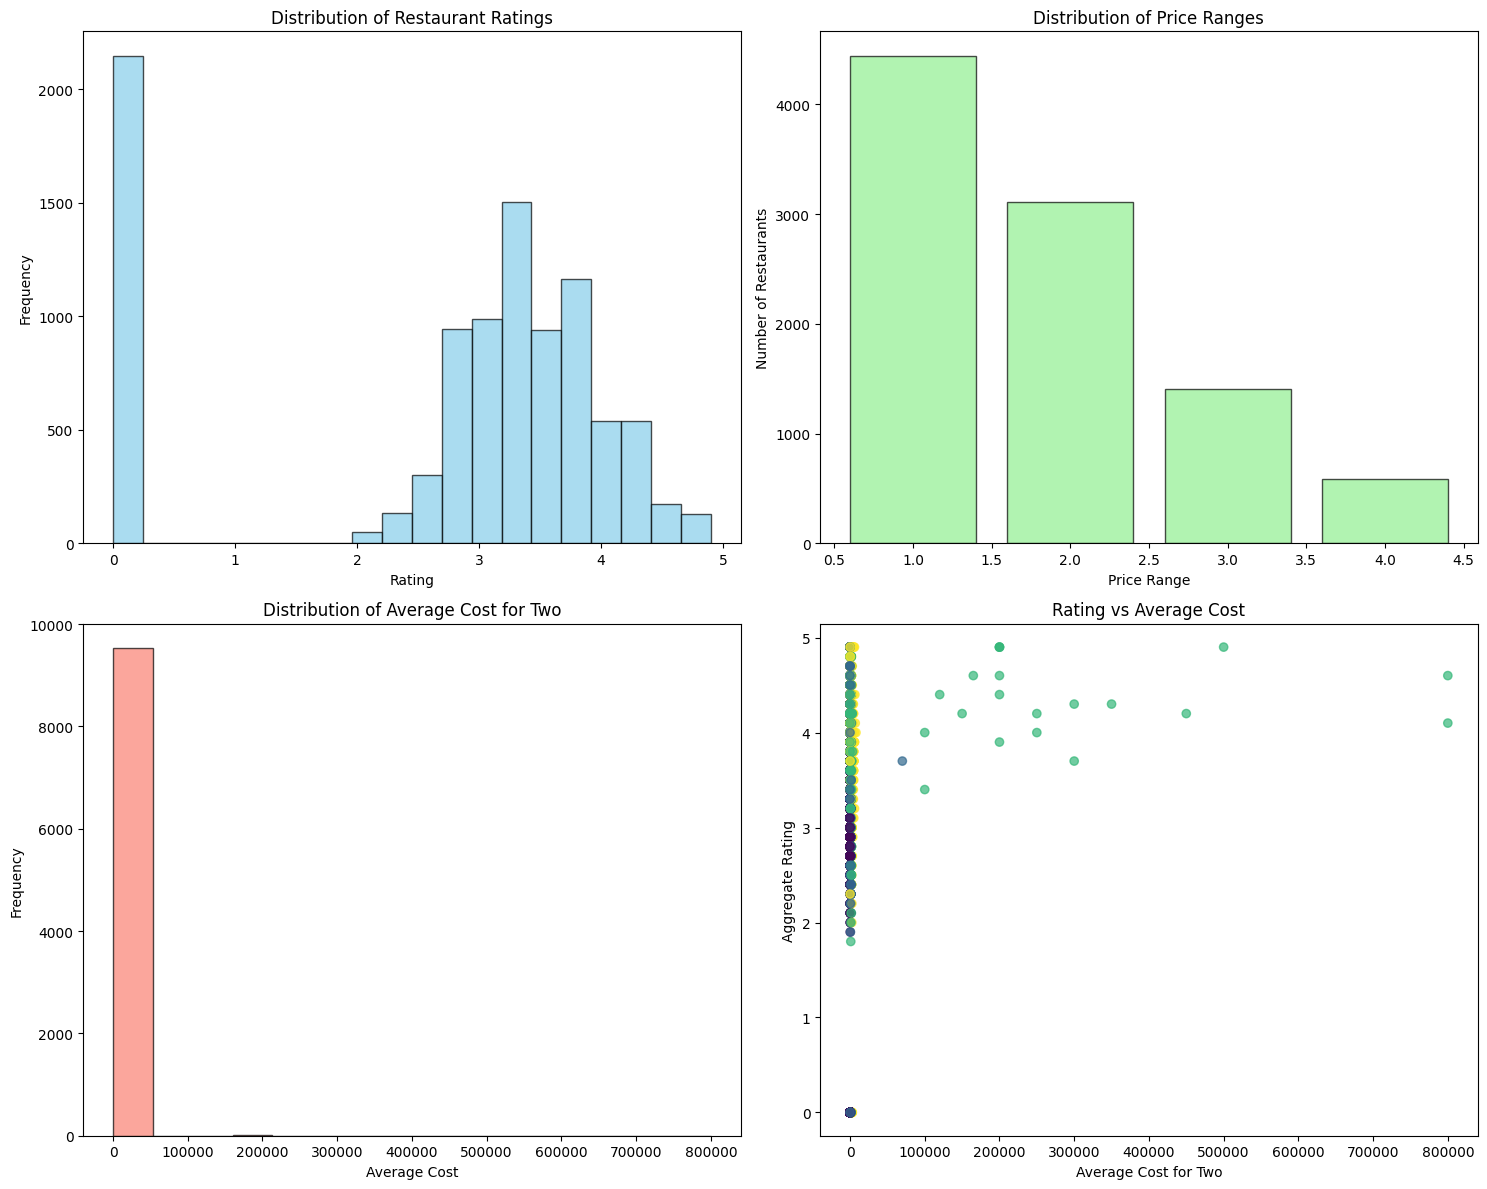


Initializing recommendation system...
Feature matrix prepared with shape: (9551, 158)

=== TESTING RECOMMENDATION SYSTEM ===

1. Testing preference-based recommendations:
User preferences: Japanese cuisine, max price 2000, min rating 4.0

1. Marukame Udon
   Cuisines: Japanese
   Rating: 4.9 (Excellent)
   Cost for two: 10
   City: Rest of Hawaii

2. Ooma
   Cuisines: Japanese, Sushi
   Rating: 4.9 (Excellent)
   Cost for two: 1500
   City: Mandaluyong City

3. Miyabi 9
   Cuisines: Japanese, Sushi
   Rating: 4.8 (Excellent)
   Cost for two: 25
   City: Des Moines


2. Testing content-based recommendations:
Finding restaurants similar to: Le Petit Souffle

1. Izakaya Kikufuji
   Cuisines: Japanese
   Rating: 4.5
   Similarity Score: 0.891
   City: Makati City

2. Kuuraku
   Cuisines: Japanese
   Rating: 3.9
   Similarity Score: 0.866
   City: Gurgaon

3. Sambo Kojin
   Cuisines: Japanese, Korean
   Rating: 4.8
   Similarity Score: 0.864
   City: Mandaluyong City

🔍 CUSTOM RESTAURANT R

In [ ]:
def main():
    print("🍽️ Restaurant Recommendation System")
    print("=" * 50)

    # Step 1: Load and preprocess data
    df1 = load_and_preprocess_data(df)
    df_processed, scaler, label_encoder = preprocess_data(df1)

    # Step 2: Create visualizations
    print("\nGenerating data visualizations...")
    visualize_data(df_processed)

    # Step 3: Initialize recommendation system
    print("\nInitializing recommendation system...")
    recommender = RestaurantRecommendationSystem(df_processed, scaler)

    # Step 4: Test the system
    test_recommendation_system(recommender, df_processed)

    # Step 5: Interactive recommendation function
    def get_custom_recommendations():
        """Interactive function to get custom recommendations"""
        print("\n" + "="*50)
        print("🔍 CUSTOM RESTAURANT RECOMMENDATIONS")
        print("="*50)

        # Sample preferences (you can modify these)
        sample_preferences = [
            {
                'name': 'Budget Japanese Food Lover',
                'preferences': {'cuisine': 'Japanese', 'max_price': 1500, 'min_rating': 4.0}
            },
            {
                'name': 'Luxury Diner',
                'preferences': {'min_rating': 4.5, 'max_price': 10000}
            },
            {
                'name': 'Asian Cuisine Explorer',
                'preferences': {'cuisine': 'Asian', 'min_rating': 4.0}
            }
        ]

        for persona in sample_preferences:
            print(f"\n👤 {persona['name']}:")
            print(f"Preferences: {persona['preferences']}")

            recs = recommender.get_recommendations_by_preferences(
                persona['preferences'], top_k=3
            )

            if recs:
                print("Recommendations:")
                for i, rec in enumerate(recs, 1):
                    print(f"  {i}. {rec['Restaurant_Name']} - {rec['Cuisines']}")
                    print(f"     Rating: {rec['Aggregate_rating']} | Cost: {rec['Average_Cost_for_two']}")

                # Evaluate recommendations
                evaluation = evaluate_recommendations(recs, persona['preferences'])
                print(f"  📊 Evaluation: Avg Rating: {evaluation['average_rating']}, "
                      f"Cuisine Match: {evaluation['cuisine_match_rate']}%")
            else:
                print("  No matching restaurants found.")

    # Run custom recommendations
    get_custom_recommendations()

    print("\n" + "="*50)
    print("✅ Restaurant Recommendation System Complete!")
    print("="*50)

if __name__ == "__main__":
    main()